<a href="https://colab.research.google.com/github/talha469/Flight-Price-Estimation/blob/main/Flight_Price_Estimator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('display.max_columns',35)
data = pd.read_excel("/content/Flight_estimator.xlsx")


#Dealing with missing values
#print(data.shape)
#print(data.isna().sum())
data = data.dropna()
#print(data.isna().sum())
#print(data.shape)
#print(data.dtypes)
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [3]:
#Convert data types as desired
def Change_datetime(col):
    data[col] = pd.to_datetime(data[col])

for i in ['Date_of_Journey','Dep_Time','Arrival_Time']:
    Change_datetime(i)

data.head()


,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2021-04-08 22:20:00,2021-03-22 01:10:00,2h 50m,non-stop,No info,3897
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,2021-04-08 05:50:00,2021-04-08 13:15:00,7h 25m,2 stops,No info,7662
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,2021-04-08 09:25:00,2021-06-10 04:25:00,19h,2 stops,No info,13882
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,2021-04-08 18:05:00,2021-04-08 23:30:00,5h 25m,1 stop,No info,6218
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,2021-04-08 16:50:00,2021-04-08 21:35:00,4h 45m,1 stop,No info,13302


In [5]:
#Seperating date and month
data['Journey_Month'] = data['Date_of_Journey'].dt.month
data['Journey_Date'] = data['Date_of_Journey'].dt.date

#Droping Date_of_journey coloumn
data.drop('Date_of_Journey',axis = 1,inplace = True)

data['Departure_hour'] = data['Dep_Time'].dt.hour
data['Departure_minute'] = data['Dep_Time'].dt.minute

data.drop('Dep_Time',axis = 1,inplace = True)

### 2nd way to seperate hour and minutes
#Seprating Hour and minute from Departure time
#def extractDepTime(col):
#    data[col+'_hour'] = data[col].dt.hour
#    data[col+'_Minute'] = data[col].dt.minute
#extractDepTime('Dep_Time')
#data.drop('Dep_Time',axis=1,inplace=True)


data.head()

KeyError: ignored

In [6]:

#Separating Hour and minute from Arrival Time
data['Arrival_hour'] = data['Arrival_Time'].dt.hour
data['Arrival_minute'] = data['Arrival_Time'].dt.minute
data.drop('Arrival_Time',axis =1,inplace=True)
#print(data.head())

#Appending hour and minutes in Duration coloumn
duration = list(data['Duration'])
for i in range(len(duration)):
    if len(duration[i].split(" ")) == 2:
        pass
    else:
        if 'h' in duration[i]:
            duration[i] = duration[i] + ' 0m'
        else:
            duration[i] = '0h '+duration[i]
data['Duration'] = duration

#Separating Hour and minutes from Duration Coloumn
def hour(col):
    return col.split(" ")[0][0:-1]
def minute(col):
    return col.split(" ")[1][0:-1]
data['Duration_Hour'] = data['Duration'].apply(hour)
data['Duration_Minute'] = data['Duration'].apply(minute)
data.drop('Duration',axis=1,inplace=True)
#print(data.head())
#print(data.dtypes)
data['Duration_Hour'] = data['Duration_Hour'].astype(int)
data['Duration_Minute'] = data['Duration_Minute'].astype(int)


In [40]:
data.dtypes

Airline             object
Source              object
Destination         object
Route               object
Total_Stops         object
Additional_Info     object
Price                int64
Journey_Month        int64
Journey_Date        object
Departure_hour       int64
Departure_minute     int64
Arrival_hour         int64
Arrival_minute       int64
Duration_Hour        int64
Duration_Minute      int64
dtype: object

In [7]:
###Separating Categorical and continuous data
categorical = [col for col in data.columns if data[col].dtype == 'O']
#print(categorical)
continuous = [col for col in data.columns if data[col].dtype != 'O']
#print(continuous)

#Categorical data are of two types
#1_Nominal Data  data that is not in any order e.g name of country
#perform one-hot encoding

#2_Ordinal data data have some hirerachy
#label encoding


Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64


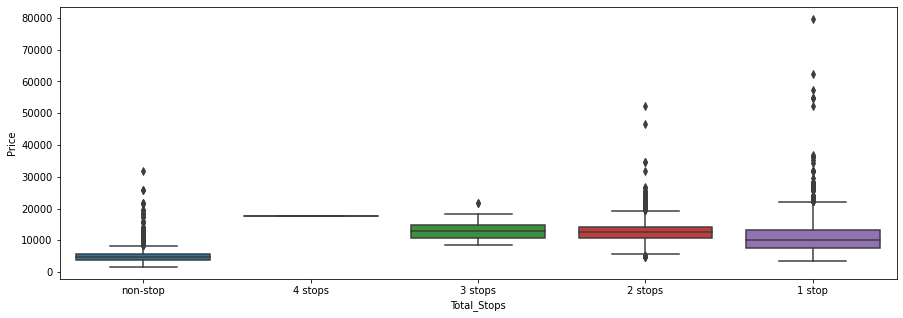

In [8]:
#Handling Airline data
categorical_data = data[categorical]
print(categorical_data['Airline'].value_counts())
plt.figure(figsize=(15,5))
sns.boxplot(x = 'Total_Stops', y='Price',data = data.sort_values('Total_Stops',ascending=False))
plt.show()


In [9]:

##Performing one-hot encoding
Airline = pd.get_dummies(categorical_data['Airline'],drop_first=True)
Source = pd.get_dummies(categorical_data['Source'],drop_first=True)
Destination = pd.get_dummies(categorical_data['Destination'],drop_first=True)
print(Destination)

#Handling Route
categorical_data['Route_1'] = categorical_data['Route'].str.split('→').str[0]
categorical_data['Route_2'] = categorical_data['Route'].str.split('→').str[1]
categorical_data['Route_3'] = categorical_data['Route'].str.split('→').str[2]
categorical_data['Route_4'] = categorical_data['Route'].str.split('→').str[3]
categorical_data['Route_5'] = categorical_data['Route'].str.split('→').str[4]

print(categorical_data['Route_1'])

categorical_data.drop('Route',axis=1,inplace=True)
#print(categorical_data.isnull().sum())

for i in ['Route_3','Route_4','Route_5']:
    categorical_data[i].fillna('None',inplace = True)
print(categorical_data.isnull().sum())


       Cochin  Delhi  Hyderabad  Kolkata  New Delhi
0           0      0          0        0          1
1           0      0          0        0          0
2           1      0          0        0          0
3           0      0          0        0          0
4           0      0          0        0          1
...       ...    ...        ...      ...        ...
10678       0      0          0        0          0
10679       0      0          0        0          0
10680       0      1          0        0          0
10681       0      0          0        0          1
10682       1      0          0        0          0

[10682 rows x 5 columns]
0        BLR 
1        CCU 
2        DEL 
3        CCU 
4        BLR 
         ... 
10678    CCU 
10679    CCU 
10680    BLR 
10681    BLR 
10682    DEL 
Name: Route_1, Length: 10682, dtype: object
Airline            0
Source             0
Destination        0
Total_Stops        0
Additional_Info    0
Journey_Date       0
Route_1            0
Route

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

In [10]:
##Checking number of categories in the data
for i in categorical_data.columns:
    print('{} has total {} categories'.format(i,len(categorical_data[i].value_counts())))


Airline has total 12 categories
Source has total 5 categories
Destination has total 6 categories
Total_Stops has total 5 categories
Additional_Info has total 10 categories
Journey_Date has total 40 categories
Route_1 has total 5 categories
Route_2 has total 45 categories
Route_3 has total 30 categories
Route_4 has total 14 categories
Route_5 has total 6 categories


In [11]:
##Route3 and Route4 have much categories so ont-hot encoding doesn't suits here
##Using lable encoding
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
for i in ['Route_1','Route_2','Route_3','Route_4','Route_5']:
    categorical_data[i] = encoder.fit_transform(categorical_data[i])

categorical_data.head()

categorical_data.drop('Additional_Info',axis = 1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Airline,Source,Destination,Total_Stops,Journey_Date,Route_1,Route_2,Route_3,Route_4,Route_5
0,IndiGo,Banglore,New Delhi,non-stop,2019-03-24,0,13,29,13,5
1,Air India,Kolkata,Banglore,2 stops,2019-01-05,2,25,1,3,5
2,Jet Airways,Delhi,Cochin,2 stops,2019-09-06,3,32,4,5,5
3,IndiGo,Kolkata,Banglore,1 stop,2019-12-05,2,34,3,13,5
4,IndiGo,Banglore,New Delhi,1 stop,2019-01-03,0,34,8,13,5
...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,non-stop,2019-09-04,2,5,29,13,5
10679,Air India,Kolkata,Banglore,non-stop,2019-04-27,2,5,29,13,5
10680,Jet Airways,Banglore,Delhi,non-stop,2019-04-27,0,13,29,13,5
10681,Vistara,Banglore,New Delhi,non-stop,2019-01-03,0,13,29,13,5


In [12]:
categorical_data['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [13]:
#Replacing Total stops with numerical data
categorical_data1 = categorical_data
dictionarynew = {'non-stop':0, '2 stops':2, '1 stop':1, '3 stops':3, '4 stops':4}
categorical_data1['Total_Stops'] = categorical_data1['Total_Stops'].map(dictionarynew)
categorical_data1.head()



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,Airline,Source,Destination,Total_Stops,Additional_Info,Journey_Date,Route_1,Route_2,Route_3,Route_4,Route_5
0,IndiGo,Banglore,New Delhi,0,No info,2019-03-24,0,13,29,13,5
1,Air India,Kolkata,Banglore,2,No info,2019-01-05,2,25,1,3,5
2,Jet Airways,Delhi,Cochin,2,No info,2019-09-06,3,32,4,5,5
3,IndiGo,Kolkata,Banglore,1,No info,2019-12-05,2,34,3,13,5
4,IndiGo,Banglore,New Delhi,1,No info,2019-01-03,0,34,8,13,5


In [16]:
#Concatinating the data
training_data = pd.concat([categorical_data1['Route_1'],categorical_data1['Route_2'],categorical_data1['Route_3'],
categorical_data1['Route_4'],categorical_data1['Route_5'],categorical_data1['Total_Stops'],
                           Airline,Source,Destination,data[continuous]],axis=1)
#print(training_data.head(),'/n')



In [17]:
training_data.head()

,Route_1,Route_2,Route_3,Route_4,Route_5,Total_Stops,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi,Price,Journey_Month,Departure_hour,Departure_minute,Arrival_hour,Arrival_minute,Duration_Hour,Duration_Minute
0,0,13,29,13,5,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,3897,3,22,20,1,10,2,50
1,2,25,1,3,5,2,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,7662,1,5,50,13,15,7,25
2,3,32,4,5,5,2,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,13882,9,9,25,4,25,19,0
3,2,34,3,13,5,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,6218,12,18,5,23,30,5,25
4,0,34,8,13,5,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,13302,1,16,50,21,35,4,45


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2164: UserWarning: `displot` is a figure-level function and does not accept the ax= paramter. You may wish to try histplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


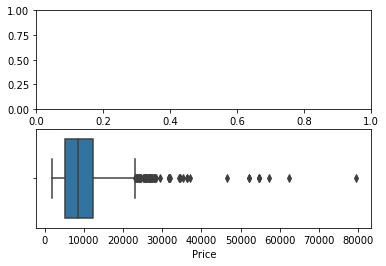

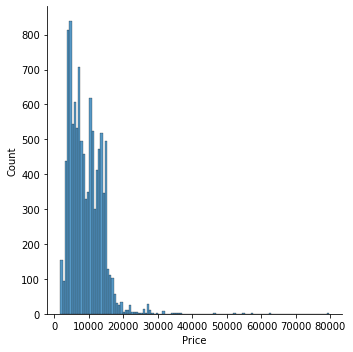

In [18]:
def plot(col):
  fig,(axis1, axis2) = plt.subplots(2,1)
  sns.displot(training_data[col],ax =axis1)
  sns.boxplot(training_data[col], ax = axis2)

plot('Price')

From the graph it is clear that it is positive skewed

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2164: UserWarning: `displot` is a figure-level function and does not accept the ax= paramter. You may wish to try histplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


,Route_1,Route_2,Route_3,Route_4,Route_5,Total_Stops,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi,Journey_Month,Departure_hour,Departure_minute,Arrival_hour,Arrival_minute,Duration_Hour,Duration_Minute
0,0,13,29,13,5,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,3,22,20,1,10,2,50
1,2,25,1,3,5,2,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,5,50,13,15,7,25
2,3,32,4,5,5,2,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,9,9,25,4,25,19,0
3,2,34,3,13,5,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,12,18,5,23,30,5,25
4,0,34,8,13,5,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,16,50,21,35,4,45


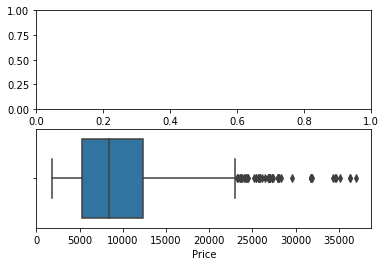

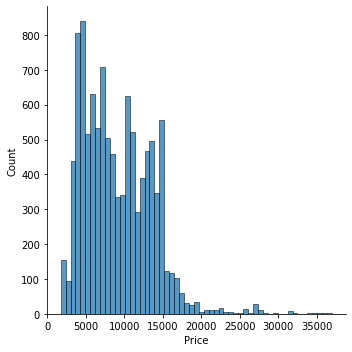

In [19]:
training_data['Price'] = np.where(training_data['Price']>=40000,training_data['Price'].median(),training_data['Price'])
plot('Price')

#Seperating dependent and independent features
X = training_data.drop('Price',axis=1)
y = training_data['Price']
X.head()

In [20]:
#Selecting Best features
import sklearn
from sklearn.feature_selection import mutual_info_classif
mutual = mutual_info_classif(X,y)


In [25]:
feteched_data = pd.DataFrame(mutual, index=X.columns)
feteched_data.columns = ['Importance']
feteched_data.sort_values(by = 'Importance',ascending=False )

,Importance
Route_2,2.786936
Route_3,2.279847
Total_Stops,2.142498
Route_1,2.050023
Arrival_hour,1.864391
Duration_Hour,1.783906
Delhi,1.559777
Cochin,1.523956
Arrival_minute,1.519395
Route_4,1.431826


In [36]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size = 0.2)
!pip install seaborn --upgrade

Requirement already up-to-date: seaborn in /usr/local/lib/python3.7/dist-packages (0.11.1)


Training score: 0.8914585448767658
Predictions are [ 9031.345       8126.365      17199.26       ...  5804.90633333
 12930.59047619 11890.3855    ]


r2 score is 0.7258558432285162
MAE: 1443.3651294047377
MSE: 5490387.563349526
RMSE: 37.991645521150275


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


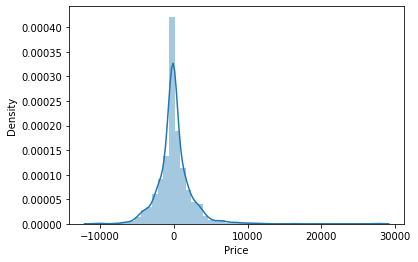

In [38]:
from sklearn import metrics
import pickle
def prediction(ml_model,number):
  model = ml_model.fit(x_train,y_train)
  print('Training score: {}'.format(model.score(x_train,y_train)))
  predictions = model.predict(x_test)
  print('Predictions are {}'.format(predictions))
  print('\n')
  r2_score = metrics.r2_score(y_test,predictions)
  print('r2 score is {}'.format(r2_score))
  print('MAE:',metrics.mean_absolute_error(y_test,predictions))
  print('MSE:',metrics.mean_squared_error(y_test,predictions))
  print('RMSE:',np.sqrt(metrics.mean_absolute_error(y_test,predictions)))
  sns.distplot(y_test - predictions) 

  if number == 1:
    file = '/content/RandomForestRegression.pkl'
    with open(file, "wb") as File:
      pickle.dump(model, File)

from sklearn.ensemble import RandomForestRegressor
prediction(RandomForestRegressor(),1)                                   

Training score: 0.5996125564226078
Predictions are [10879.41454075  9579.06654842 14180.9686179  ...  3782.65237819
 11472.20871534 11714.50810055]


r2 score is 0.577781079773376
MAE: 1955.3696567307534
MSE: 8455936.234145017
RMSE: 44.21956192377705


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Training score: 0.7425761938083336
Predictions are [ 8623.   9093.  13911.6 ...  6344.4 12376.8 12530.2]


r2 score is 0.5888040237909076
MAE: 1731.533738886289
MSE: 8235175.611492747
RMSE: 41.611701946523276


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Training score: 0.6543007606787595
Predictions are [ 7531.  7927. 17261. ...  6300. 10844. 11753.]


r2 score is 0.5799913513287562
MAE: 1634.3654656059898
MSE: 8411670.299017314
RMSE: 40.42728615188002


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


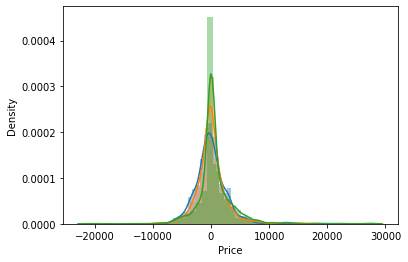

In [39]:
#trying algorithms
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeClassifier
prediction(LinearRegression(),0)
prediction(KNeighborsRegressor(),0)
prediction(DecisionTreeClassifier(),0)